Load Data

In [21]:
import pandas as pd

data_train = pd.read_csv('train.csv', delimiter=";") # Load Train Datasets
data_test = pd.read_csv('test.csv', delimiter=";") # Load Test Datasets
data_eval = pd.read_csv('evaluation.csv', delimiter=";") # Load Evaluation Datasets

X_train = data_train['title'].values + data_train['text'].values # Create Train Data
X_test = data_test['title'].values + data_test['text'].values # Create Test Data
X_eval = data_eval['title'].values + data_eval['text'].values # Create Evaluation Data

Y_train = data_train['label'].values # Create Train Labels
Y_test = data_test['label'].values # Create Test Labels
Y_eval = data_eval['label'].values # Create Evaluation Labels

Preprocessing Data

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token="Token") # Create Empty Dictionary
tokenizer.fit_on_texts(X_train) # Create Dictionary With 5000 words popular in train data

# Preprocessing Train Data
train_sequences = tokenizer.texts_to_sequences(X_train) # Mapping text to tokenizer
padded_train_sequence = pad_sequences(train_sequences, maxlen=250, padding="post") # Create sequences based on tokenizer

# Preprocessing Test Data
test_sequences = tokenizer.texts_to_sequences(X_test) # Mapping text to tokenizer
padded_test_sequence = pad_sequences(test_sequences, maxlen=250, padding="post") # Create sequences based on tokenizer

# Preprocessing Evaluate Data
eval_sequences = tokenizer.texts_to_sequences(X_eval) # Mapping text to tokenizer
padded_eval_sequence = pad_sequences(eval_sequences, maxlen=250, padding="post") # Create sequences based on tokenizer



Build And Train RNN simple Models

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=250),
    SimpleRNN(256, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(
    padded_train_sequence, Y_train, 
    validation_data=(padded_test_sequence, Y_test),
    batch_size=128, 
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
191/191 [==============================] - 123s 635ms/step - loss: 0.5635 - accuracy: 0.6924 - val_loss: 0.3363 - val_accuracy: 0.8495
Epoch 2/20
191/191 [==============================] - 129s 674ms/step - loss: 0.3682 - accuracy: 0.8312 - val_loss: 0.3426 - val_accuracy: 0.8502
Epoch 3/20
191/191 [==============================] - 133s 698ms/step - loss: 0.3259 - accuracy: 0.8528 - val_loss: 0.3564 - val_accuracy: 0.8464
Epoch 4/20
191/191 [==============================] - 133s 697ms/step - loss: 0.2957 - accuracy: 0.8681 - val_loss: 0.2984 - val_accuracy: 0.8724
Epoch 5/20
191/191 [==============================] - 132s 693ms/step - loss: 0.4032 - accuracy: 0.8244 - val_loss: 0.3795 - val_accuracy: 0.8206
Epoch 6/20
191/191 [==============================] - 128s 672ms/step - loss: 0.2907 - accuracy: 0.8706 - val_loss: 0.3337 - val_accuracy: 0.8499
Epoch 7/20
191/191 [==============================] - 130s 683ms/step - loss: 0.2571 - accuracy: 0.8807 - val_loss: 0.3308 -

Evaluate Models

254/254 [==============================] - 18s 69ms/step
Confusion Matrix: 

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      3803
           1       0.81      0.97      0.88      4314

    accuracy                           0.87      8117
   macro avg       0.88      0.86      0.86      8117
weighted avg       0.88      0.87      0.86      8117



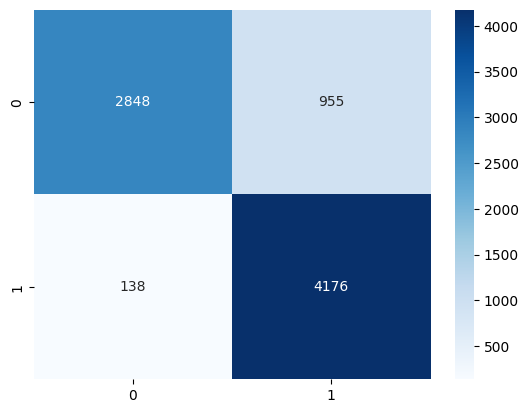

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as plt
import seaborn as sns

predictions = (model.predict(padded_eval_sequence) > 0.5).astype("int32")
print("Confusion Matrix: ")

cm = confusion_matrix(Y_eval, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# plt.show()

print("\nClassification Report: ")
print(classification_report(Y_eval, predictions))


Save Models And Tokenizer

In [25]:
# model.save("Simple_RNN.h5")
# import pickle

# with open('tokenizer.pkl', 'rb') as f:
#     tokenizer = pickle.load(f)